In [149]:
import numpy as np
import matplotlib.pyplot as plt
import math


plt.rcParams.update({'font.size': 20})



In [150]:

data1 = np.loadtxt('square_probs_1.txt')
data2 = np.loadtxt('square_probs_2.txt')
data3 = np.loadtxt('square_probs_3.txt')


In [151]:
def P(r, nmax):
    l = 0
    K = 0
    if nmax == 1:
        l = r / (1- r)
    elif nmax == 2:
        l = (2* r - 1 + np.sqrt(1 + 4 * r - 4 * r**2))/(2 - 2 * r)
    elif nmax == 3:
        l = (27 * r ** 3 - 54 * r ** 2 + 3*np.sqrt(6)*np.sqrt(27 * r ** 6 - 108 * r ** 5 + 153 * r ** 4 - 82 * r ** 3 + 4 * r ** 2 + 4 * r + 2) + 18*r + 10) ** (1/3)/(3 - 3 * r) - (9 * r ** 2 - 12 * r + 2) / (3*(1-r)*(27 * r ** 3 - 54 * r ** 2 + 3*np.sqrt(6)*np.sqrt(27 * r ** 6 - 108 * r ** 5 + 153 * r ** 4 - 82 * r ** 3 + 4 * r ** 2 + 4 * r + 2) + 18*r + 10) ** (1/3)) - (2-3*r)/(3-3*r)
    
    for n in range(nmax+1):
        K += l ** n / math.factorial(n)
    
    p = np.zeros((nmax+1, len(r)))

    for n in range(nmax+1):
        p[n] = l ** n / math.factorial(n) / K
    return p

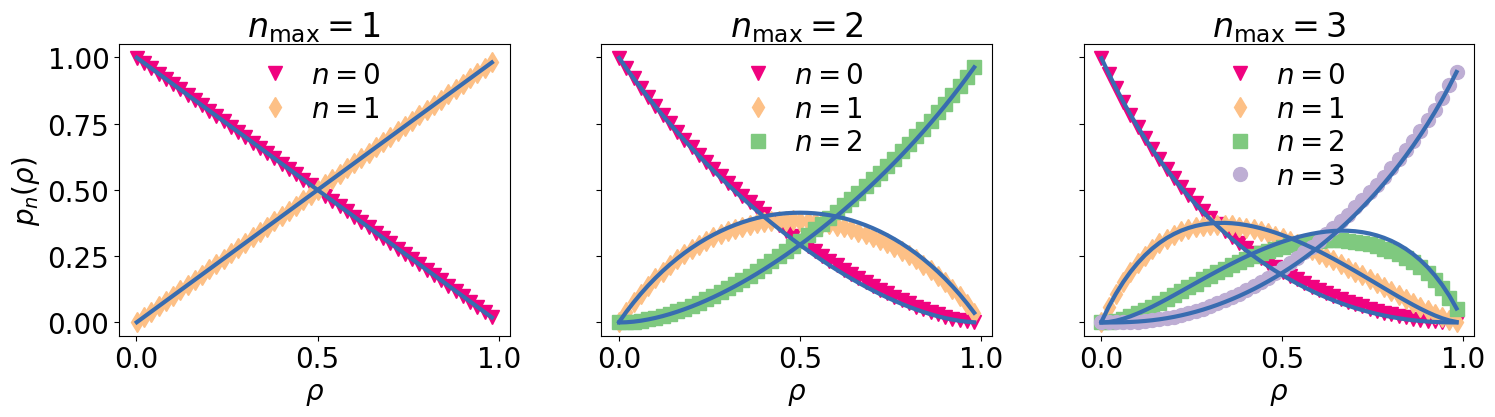

In [152]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15, 4))

plt.tight_layout()

lw = 3
ms = 10
lc ='#386cb0'

ax[0].plot(data1[:,0], data1[:,1], 'v', lw=lw, ms=ms, color='#f0027f', label=r"$n=0$")
ax[0].plot(data1[:,0], data1[:,2], 'd', lw=lw, ms=ms, color='#fdc086', label=r"$n=1$")
ax[0].plot(data1[:,0], P(data1[:,0], 1)[0], lw=lw, color=lc)
ax[0].plot(data1[:,0], P(data1[:,0], 1)[1], lw=lw, color=lc)


ax[1].plot(data2[:,0], data2[:,1], 'v', lw=lw, ms=ms, color='#f0027f', label=r"$n=0$")
ax[1].plot(data2[:,0], data2[:,2], 'd', lw=lw, ms=ms, color='#fdc086', label=r"$n=1$")
ax[1].plot(data2[:,0], data2[:,3], 's', lw=lw, ms=ms, color='#7fc97f', label=r"$n=2$")
ax[1].plot(data2[:,0], P(data2[:,0], 2)[0], lw=lw, color=lc)
ax[1].plot(data2[:,0], P(data2[:,0], 2)[1], lw=lw, color=lc)
ax[1].plot(data2[:,0], P(data2[:,0], 2)[2], lw=lw, color=lc)


ax[2].plot(data3[:,0], data3[:,1], 'v', lw=lw, ms=ms, color='#f0027f', label=r"$n=0$")
ax[2].plot(data3[:,0], data3[:,2], 'd', lw=lw, ms=ms, color='#fdc086', label=r"$n=1$")
ax[2].plot(data3[:,0], data3[:,3], 's', lw=lw, ms=ms, color='#7fc97f', label=r"$n=2$")
ax[2].plot(data3[:,0], data3[:,4], 'o', lw=lw, ms=ms, color='#beaed4', label=r"$n=3$")
ax[2].plot(data3[:,0], P(data3[:,0], 3)[0], lw=lw, color=lc)
ax[2].plot(data3[:,0], P(data3[:,0], 3)[1], lw=lw, color=lc)
ax[2].plot(data3[:,0], P(data3[:,0], 3)[2], lw=lw, color=lc)
ax[2].plot(data3[:,0], P(data3[:,0], 3)[3], lw=lw, color=lc)

ax[0].legend(loc='upper center', frameon=False, labelspacing=0.2, handletextpad=0.3, borderaxespad=0.2)
ax[1].legend(loc='upper center', frameon=False, labelspacing=0.2, handletextpad=0.3, borderaxespad=0.2)
ax[2].legend(loc='upper center', frameon=False, labelspacing=0.2, handletextpad=0.3, borderaxespad=0.2)

ax[0].set_xlabel(r"$\rho$")
ax[1].set_xlabel(r"$\rho$")
ax[2].set_xlabel(r"$\rho$")

ax[0].set_ylabel(r"$p_n(\rho)$")

ax[0].set_title(r'$n_\mathrm{max}=1$')
ax[1].set_title(r'$n_\mathrm{max}=2$')
ax[2].set_title(r'$n_\mathrm{max}=3$')

plt.savefig('DetailedBalance.pdf', dpi=500, bbox_inches='tight')